# 머신러닝
## 데이터 시각화
### 데이터 종류
 - 수치형 데이터: 
     - 연속형(키,몸무게,돈) ->실수
     - 이산형(개수)->정수
          - 히스토그램, 커널밀도 추정, 분포도, 러그플롯(연속->이산)
          - seaborn : histplot(), kdeplot(), displot(), rugplot()
 - 범주형 데이터:
     - 순서형(순위)->독립적
     - 명목형(성별,우편 번호,음식 종류)->산수 불가
          - 막대, 포인트플롯, 박스플롯, 바이올린플롯, 카운트플롯, 파이그래프(순서->명목)
 - 데이터 관계 시각화 : 히트맵, 라인플롯, 산점도, 산점도+회귀선

### 타이타닉 데이터 시각화
#### 수치형 데이터

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\SYU\miniconda3\envs\analysis\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='Count'>

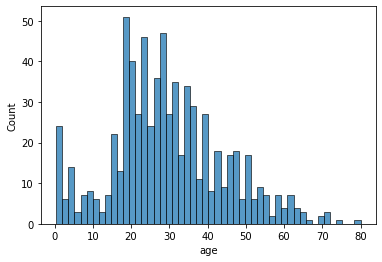

In [4]:
sns.histplot(data=df,x='age', bins=50) #기본 y==count, bins==세부구간 나누기
# => 10후반~30 초반이 가장 많음

<AxesSubplot:xlabel='fare', ylabel='Count'>

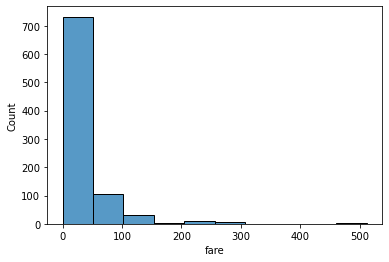

In [5]:
sns.histplot(data=df, x='fare',bins=10)
# => 비싼 요금이 적음(1등석(순서형) 적음)

<AxesSubplot:xlabel='age', ylabel='Count'>

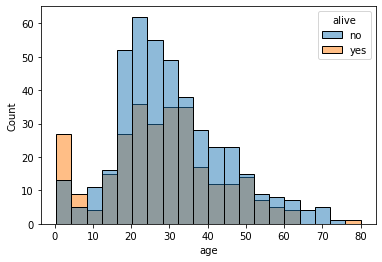

In [6]:
sns.histplot(data=df, x='age',hue='alive')
# => 20~40대가 가장 많이 죽거나 살았음

<AxesSubplot:xlabel='age', ylabel='Density'>

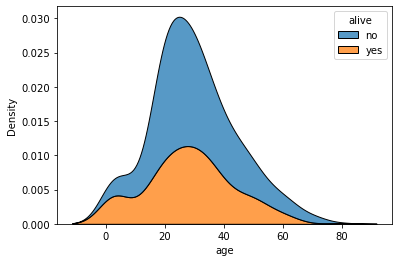

In [7]:
sns.kdeplot(data=df, x='age',hue='alive',multiple='stack') #밀도

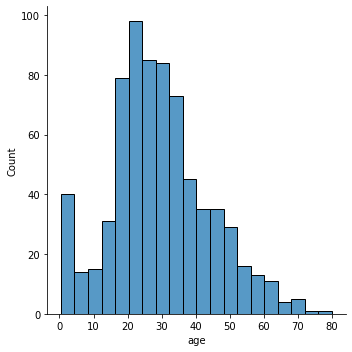

In [8]:
sns.displot(data=df, x='age')

<AxesSubplot:xlabel='pclass', ylabel='count'>

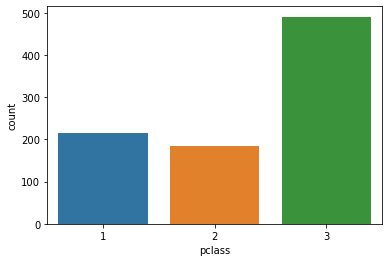

In [9]:
sns.countplot(data=df,x='pclass')

<AxesSubplot:xlabel='count', ylabel='pclass'>

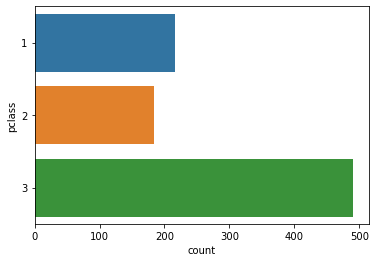

In [10]:
sns.countplot(data=df,y='pclass')

<AxesSubplot:xlabel='pclass', ylabel='fare'>

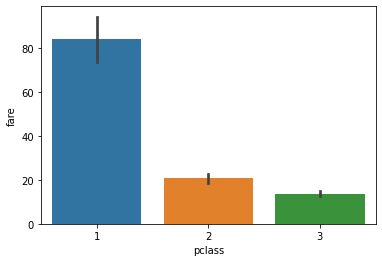

In [11]:
sns.barplot(data=df,x='pclass', y='fare') #객실 등급별에 따른 운임요금
# 오차막대기(신뢰구간)

<AxesSubplot:xlabel='pclass', ylabel='age'>

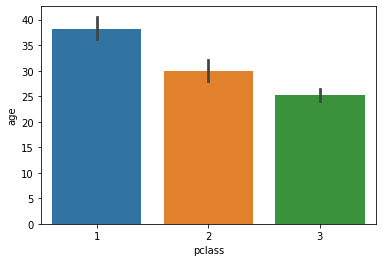

In [12]:
sns.barplot(data=df,x='pclass', y='age')

In [16]:
df['sex']=df['sex'].replace({'male':0,'female':1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='pclass', ylabel='age'>

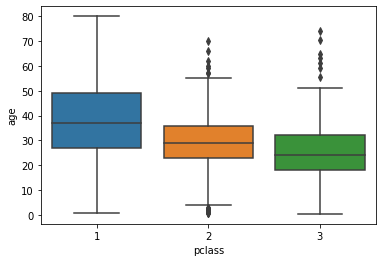

In [20]:
sns.boxplot(data=df, x='pclass', y='age')

In [24]:
xs=df['pclass'].value_counts().values
xs

array([491, 216, 184], dtype=int64)

In [51]:
labels=df['pclass'].value_counts().index
labels

Int64Index([3, 1, 2], dtype='int64')

([<matplotlib.patches.Wedge at 0x25a86c0a160>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')])

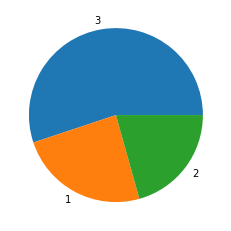

In [56]:
plt.pie(x=xs, labels=labels)

In [33]:
df[['pclass','survived']].groupby('pclass').mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:ylabel='pclass'>

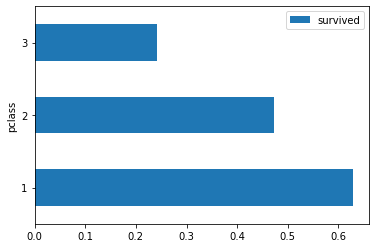

In [37]:
df[['pclass','survived']].groupby('pclass').mean().plot(kind='barh')

### 비행기 데이터
#### 범주형 데이터

In [39]:
flights= sns.load_dataset('flights')

In [40]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [46]:
pivot_flights=flights.pivot(index='month',columns='year',values='passengers')
pivot_flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


##### 연도별 월에 따른 승객 추이
- 시간이 지남에 따라 승객 수 늘어남
- 여름에 승객이 더 많음

<AxesSubplot:xlabel='year', ylabel='month'>

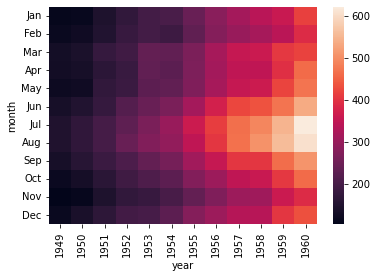

In [54]:
sns.heatmap(data=pivot_flights)

In [60]:
years=flights['year'].values
passengers=flights['passengers'].values

<AxesSubplot:>

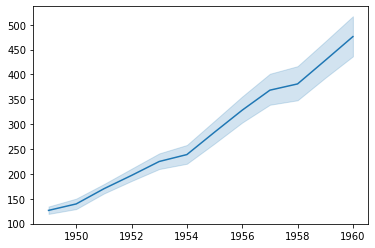

In [62]:
sns.lineplot(data=flights,x=years,y=passengers)

### 팁 데이터

In [64]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

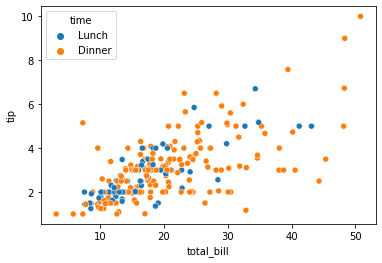

In [66]:
sns.scatterplot(x='total_bill',y='tip',data=tips, hue='time') #산점도

In [68]:
tips['ratio']=(tips['tip']/tips['total_bill']) * 100
tips

,total_bill,tip,sex,smoker,day,time,size,ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

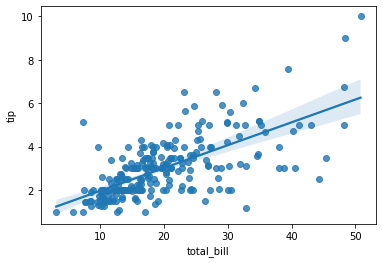

In [69]:
sns.regplot(data=tips,x='total_bill',y='tip') #회귀선을 포함한 산점도

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

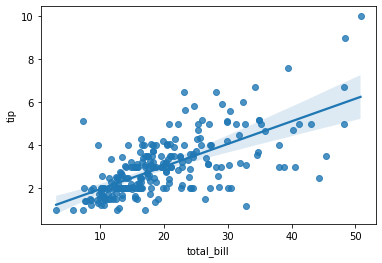

In [70]:
sns.regplot(data=tips,x='total_bill',y='tip',ci=99)